## Exploring Rodents

In [1]:
#importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Importing data to workspace
surveys = pd.read_csv("surveys.csv")
species = pd.read_csv("species.csv")

In [3]:
#Merging both the data based on common attribute
data = pd.merge(species,surveys)

In [4]:
#Filtering data specific to Rodent 
rodent_data = data[data['taxa']=='Rodent']

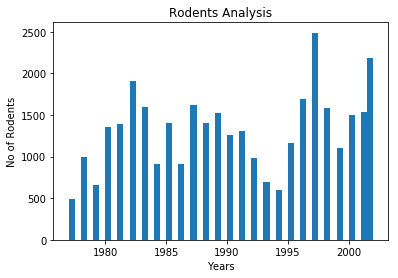

In [5]:
#Plotting histogram for no. of rodents vs the years
plt.title("Rodents Analysis")
plt.xlabel("Years")
plt.ylabel("No of Rodents")
plt.hist(rodent_data['year'],bins=50)
plt.show()

## Exploring Rodents in the winter months

In [6]:
#Filtering data based on winter months of Dec,Jan,Feb
rodent_winter_data = rodent_data[(rodent_data.month.isin([12,1,2]))]

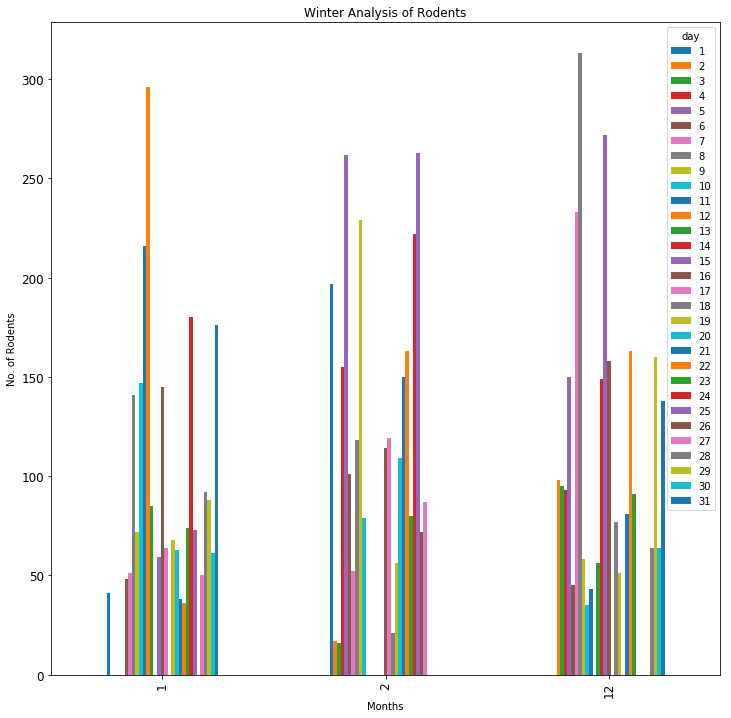

In [7]:
#Plot data 
temp = pd.crosstab(rodent_winter_data.month, rodent_winter_data.day).plot(kind='bar', fontsize=12, figsize = (12,12), title="Winter Analysis of Rodents")
temp.set_xlabel('Months')
temp.set_ylabel('No. of Rodents')

## Exploring gender data of all species across years

In [8]:
#Filtering gender data vs year
gender_data = pd.crosstab(data.year,data.sex)


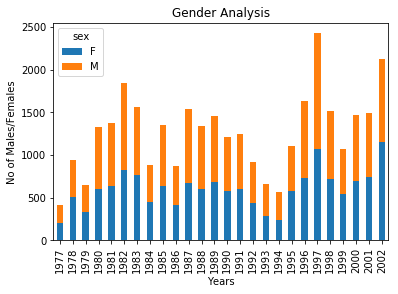

In [9]:
#Plotting gender data vs year, keep stacked= True
temp=gender_data.plot(kind='bar', stacked = True, title = "Gender Analysis")
temp.set_ylabel("No of Males/Females")
temp.set_xlabel('Years')

## Story- Hindfooot_length analysis of Rodent across years and sex

In [54]:
#filtering out hindfoot length data 
rodent_hindfoot =  data[data.taxa == 'Rodent'].loc[:,['taxa','year','sex','hindfoot_length','weight']]

In [55]:
#Dropping values which have no gender classification
rodent_hindfoot.dropna(how = 'any', inplace = True)

In [57]:
#Separated male rodent hindfoot length
rodent_hindfoot_male = rodent_hindfoot[rodent_hindfoot.sex == 'M']

In [52]:
#Taking the mean of hindfoot_length for each year
rodent_hindfoot_mean_year = rodent_hindfoot_male.groupby(['year']).hindfoot_length.mean()

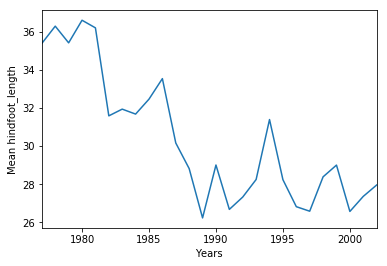

In [65]:
#Plooting the mean hindfoot length of rodents vs years
male_rodent_plot = rodent_hindfoot_mean_year.plot(kind = 'line')
male_rodent_plot.set_xlabel('Years')
male_rodent_plot.set_ylabel('Mean hindfoot_length')

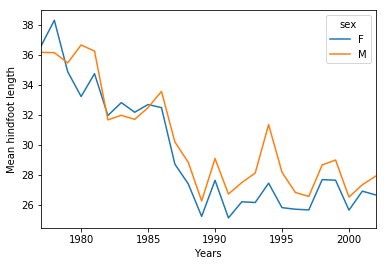

In [66]:
#Plotting rodent hindfoot_length for both genders
rodent_hindfoot_plot = data.pivot_table(index = ['year'], columns = 'sex', values = 'hindfoot_length').plot()
rodent_hindfoot_plot.set_xlabel('Years')
rodent_hindfoot_plot.set_ylabel('Mean hindfoot length')

The plot depicts the decreasing hindfoot length in both males and females across years. Female deteriotion has been harsh. In the intial years, females had larger hindfoot than males. In the subsequent years, the decrease in the length of the hindfoot of the females were higher than that of the males. Hence, the males had larger hidfoot than the females. 